In [1]:

import numpy as np #linear algebra
import pandas as pd #data processing, CSV file I/O
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [2]:
#Data files available in this directory
import os 
print("The files available are - ",os.listdir())

The files available are -  ['Pulsar star classification.ipynb', 'predicting-a-pulsar-star.zip', 'pulsar_stars.csv', '.ipynb_checkpoints']


In [3]:
data = pd.read_csv("pulsar_stars.csv")

In [4]:
#Data information
data.info()

#All data types are numeric and non-null values. No transformation required.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [5]:
data.head(7)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0


In [6]:
#Renaming the features to a coding friendly nomenclature
data = data.rename(columns= {' Mean of the integrated profile': "mean_IP",
                             ' Standard deviation of the integrated profile': "sd_IP",
                             ' Excess kurtosis of the integrated profile': "eK_IP",
                             ' Skewness of the integrated profile': "sk_IP",
                             ' Mean of the DM-SNR curve': "mean_DMSNR",
                             ' Standard deviation of the DM-SNR curve': "sd_DMSNR",
                             ' Excess kurtosis of the DM-SNR curve': "eK_DMSNR",
                             ' Skewness of the DM-SNR curve': "sk_DMSNR"
                            })


In [7]:
data.head()

,mean_IP,sd_IP,eK_IP,sk_IP,mean_DMSNR,sd_DMSNR,eK_DMSNR,sk_DMSNR,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [8]:
#Correlation between the features

data.corr()

,mean_IP,sd_IP,eK_IP,sk_IP,mean_DMSNR,sd_DMSNR,eK_DMSNR,sk_DMSNR,target_class
mean_IP,1.000000,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033,-0.673181
sd_IP,0.547137,1.000000,-0.521435,-0.539793,0.006869,-0.047632,0.029429,0.027691,-0.363708
eK_IP,-0.873898,-0.521435,1.000000,0.945729,0.414368,0.432880,-0.341209,-0.214491,0.791591
sk_IP,-0.738775,-0.539793,0.945729,1.000000,0.412056,0.415140,-0.328843,-0.204782,0.709528
mean_DMSNR,-0.298841,0.006869,0.414368,0.412056,1.000000,0.796555,-0.615971,-0.354269,0.400876
sd_DMSNR,-0.307016,-0.047632,0.432880,0.415140,0.796555,1.000000,-0.809786,-0.575800,0.491535
eK_DMSNR,0.234331,0.029429,-0.341209,-0.328843,-0.615971,-0.809786,1.000000,0.923743,-0.390816
sk_DMSNR,0.144033,0.027691,-0.214491,-0.204782,-0.354269,-0.575800,0.923743,1.000000,-0.259117
target_class,-0.673181,-0.363708,0.791591,0.709528,0.400876,0.491535,-0.390816,-0.259117,1.000000


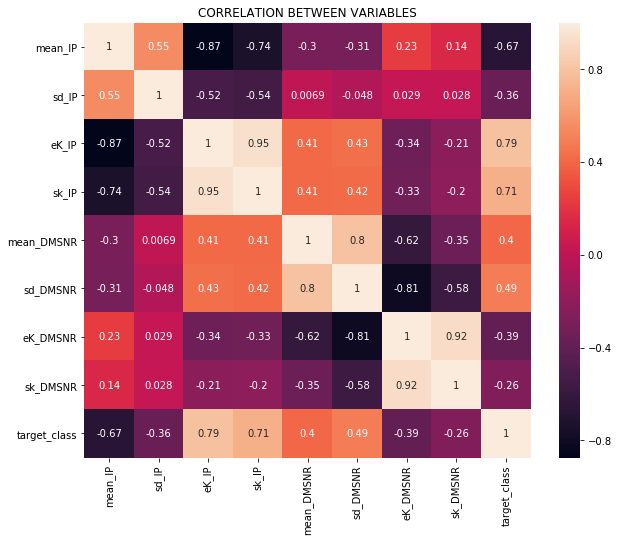

In [9]:
#Heatmap to show correlation among the features
#lightest and darkest cells show the most correlation in the data

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,linecolor="black")
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()

In [10]:
#high positive correlation between:-
#eK_IP and sk_IP(0.95), eK_DMSNR and sk_DMSNR(0.92), mean_DMSNR and sd_DMSNR(0.8)

#high negative correlation between:
#mean_IP and eK_IP(-0.87), sd_DMSNR and eKDMSNR(-0.81), sk_IP and mean_IP(-0.74)

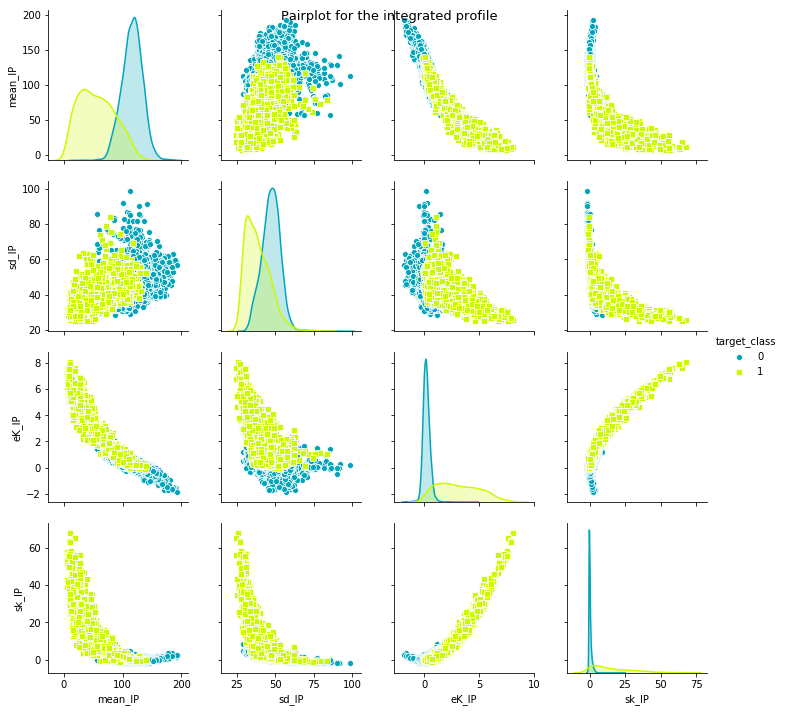

In [11]:
#Pairplots show correlation between features with classes
#used to plot pairwise relationships in a dataset

sns.pairplot(data,
            palette="nipy_spectral",
            hue="target_class",
            markers=['o','s'],
            kind="scatter",
            vars=["mean_IP",
                  "sd_IP",
                  "eK_IP",
                  "sk_IP"])
plt.suptitle("Pairplot for the integrated profile",fontsize=13)
# plt.tight_layout()
plt.show()

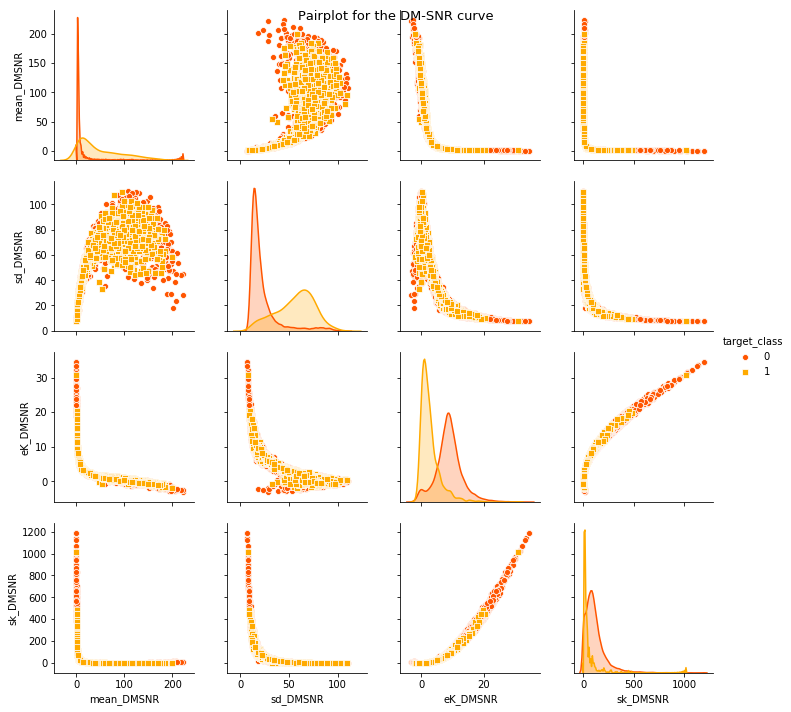

In [12]:

sns.pairplot(data,
            palette="autumn",
            hue="target_class",
            markers=['o','s'],
            kind="scatter",
            vars=["mean_DMSNR",
                  "sd_DMSNR",
                  "eK_DMSNR",
                  "sk_DMSNR"])
plt.suptitle("Pairplot for the DM-SNR curve",fontsize=13)
# plt.tight_layout()
plt.show()

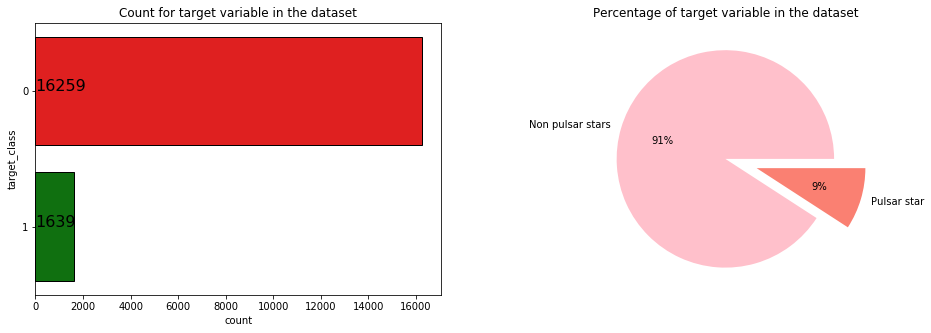

In [13]:
#Proportion of target variable in the dataset
plt.figure(figsize=(16,5))
plt.subplot(121)
ax = sns.countplot(y = data["target_class"],
                   palette =['red','green'],
                   linewidth = 1,
                   edgecolor = "k"*2)

for i,j in enumerate (data["target_class"].value_counts().values):
    ax.text(1,i,j,size =16)
plt.title('Count for target variable in the dataset')


plt.subplot(122)
plt.pie(data["target_class"].value_counts().values,
        labels =["Non pulsar stars","Pulsar star"],
        explode=(0,0.3),
        colors =["pink","salmon"],
        autopct="%1.0f%%")
plt.subplots_adjust(wspace=.2)
plt.title('Percentage of target variable in the dataset')
        

plt.show()



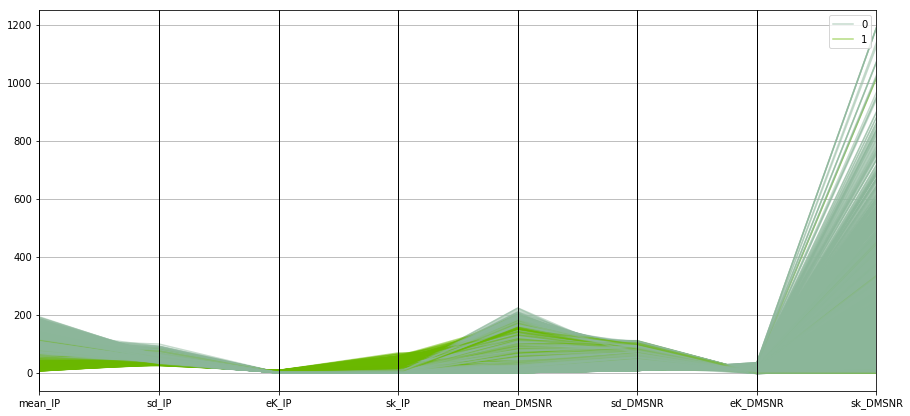

In [14]:
#Parallel coordinate plot to compare features between variables

from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,7))
parallel_coordinates(data,"target_class",alpha=0.5)
plt.show()

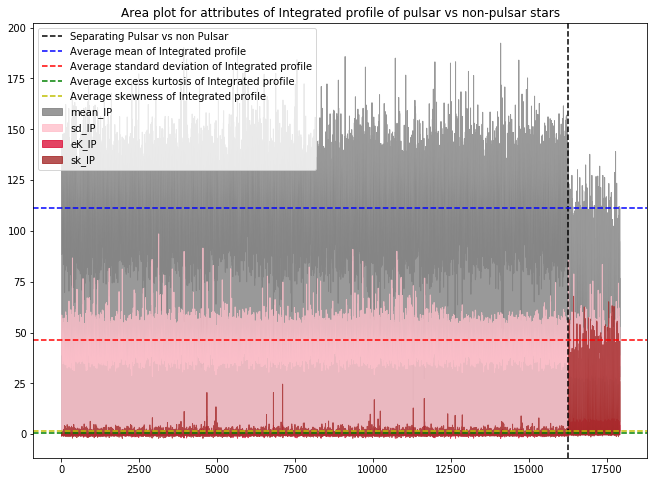

In [15]:
#Area plot for attributes of pulsar vs non-pulsar stars

st = data[data["target_class"] == 1].reset_index()
nst= data[data["target_class"] == 0].reset_index()
new = pd.concat([nst,st]).reset_index()

# st
# nst
# new

plt.figure(figsize=(11,8))

plt.stackplot(new.index,new["mean_IP"],labels=["mean_IP"],color='grey',alpha=0.8)
plt.stackplot(new.index,new["sd_IP"],labels=["sd_IP"],color='pink',alpha=0.8)
plt.stackplot(new.index,new["eK_IP"],labels=["eK_IP"],color='crimson',alpha=0.8)
plt.stackplot(new.index,new["sk_IP"],labels=["sk_IP"],color='brown',alpha=0.8)

plt.axvline(x=16259,color='black',linestyle='dashed',label='Separating Pulsar vs non Pulsar')

plt.axhline(new["mean_IP"].mean(),linestyle='dashed',label='Average mean of Integrated profile',color='b')
plt.axhline(new["sd_IP"].mean(),linestyle='dashed',label='Average standard deviation of Integrated profile',color='r')
plt.axhline(new["eK_IP"].mean(),linestyle='dashed',label='Average excess kurtosis of Integrated profile',color='g')
plt.axhline(new["sk_IP"].mean(),linestyle='dashed',label='Average skewness of Integrated profile',color='y')

plt.legend(loc="4")
plt.title("Area plot for attributes of Integrated profile of pulsar vs non-pulsar stars")

plt.show()

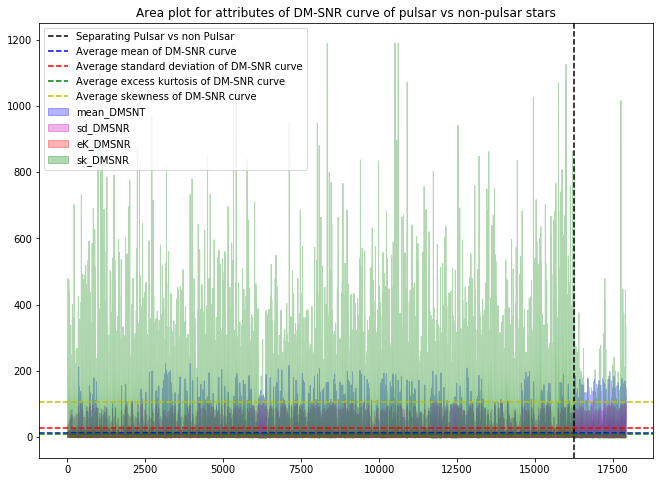

In [16]:

plt.figure(figsize=(11,8))

plt.stackplot(new.index,new["mean_DMSNR"],labels=["mean_DMSNT"],color='b',alpha=0.3)
plt.stackplot(new.index,new["sd_DMSNR"],labels=["sd_DMSNR"],color='m',alpha=0.3)
plt.stackplot(new.index,new["eK_DMSNR"],labels=["eK_DMSNR"],color='r',alpha=0.3)
plt.stackplot(new.index,new["sk_DMSNR"],labels=["sk_DMSNR"],color='g',alpha=0.3)

plt.axvline(x=16259,color='black',linestyle='dashed',label='Separating Pulsar vs non Pulsar')

plt.axhline(new["mean_DMSNR"].mean(),linestyle='dashed',label='Average mean of DM-SNR curve',color='b')
plt.axhline(new["sd_DMSNR"].mean(),linestyle='dashed',label='Average standard deviation of DM-SNR curve',color='r')
plt.axhline(new["eK_DMSNR"].mean(),linestyle='dashed',label='Average excess kurtosis of DM-SNR curve',color='g')
plt.axhline(new["sk_DMSNR"].mean(),linestyle='dashed',label='Average skewness of DM-SNR curve',color='y')

plt.legend(loc="4")
plt.title("Area plot for attributes of DM-SNR curve of pulsar vs non-pulsar stars")

plt.show()

In [17]:
#Data pre-processing

labels = data['target_class'].values
data.drop(["target_class"],axis=1,inplace=True)
features = data.values

# x = dataset.iloc[:,:-1].values
# y = dataset.iloc[:,1].values



In [18]:
#Scaling the features

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

features_scaled = scaler.fit_transform(features)
features_scaled


array([[0.72134164, 0.41768745, 0.16504291, ..., 0.11368057, 0.29498574,
        0.06388987],
       [0.51762787, 0.46090841, 0.23541516, ..., 0.0725243 , 0.36401483,
        0.10844339],
       [0.52034628, 0.19686832, 0.22113842, ..., 0.13918843, 0.28862387,
        0.05461031],
       ...,
       [0.60771193, 0.4751437 , 0.2046521 , ..., 0.49869934, 0.14965285,
        0.00550903],
       [0.58186609, 0.39361695, 0.20885482, ..., 0.05820853, 0.34892638,
        0.11418141],
       [0.27435072, 0.82458965, 0.33003783, ..., 0.5552546 , 0.04091771,
        0.00285542]])

In [19]:
#Splitting data into test and train rows

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features_scaled,labels,test_size=0.2)

print(x_train.shape)
print(x_test.shape)


(14318, 8)
(3580, 8)


In [20]:
#Applying models for prediction

#Linear regression

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression().fit(x_train,y_train)

y_pred = lr_model.predict(x_test)

lr_score = lr_model.score(x_test,y_test)

print("Percentage accuracy of linear regression model: ",lr_score*100,'%')

Percentage accuracy of linear regression model:  67.9453547293964 %


In [21]:
#Logistic regression

from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(random_state=50,solver='sag').fit(x_train,y_train)

y_pred = LR_model.predict(x_test)

LR_score = LR_model.score(x_test,y_test)

print("Percentage accuracy of logistic regression model: ",LR_score*100,"%")


Percentage accuracy of logistic regression model:  97.43016759776536 %


In [22]:
#KNN classification

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5,weights='distance').fit(x_train,y_train)

y_pred = knn_model.predict(x_test)

knn_score = knn_model.score(x_test,y_test)

print("Percentage accuracy of K-Nearest neighbour classification: ",knn_score*100,'%')


Percentage accuracy of K-Nearest neighbour classification:  97.76536312849163 %


In [23]:
#SVM classification

from sklearn.svm import SVC

svm_model = SVC(random_state=50,probability=True,kernel='poly').fit(x_train,y_train)

y_pred = svm_model.predict(x_test)

svm_score = svm_model.score(x_test,y_test)

print("Percentage accuracy of Support Vector classification: ",svm_score*100,'%')

Percentage accuracy of Support Vector classification:  93.74301675977654 %


In [24]:
#Decision tree classifier

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=50)

dt_model.fit(x_train,y_train)

y_pred = dt_model.predict(x_test)

dt_score = dt_model.score(x_test,y_test)

print("Percentage accuracy of Decision Tree classification: ",dt_score*100,'%')

Percentage accuracy of Decision Tree classification:  96.67597765363128 %


In [25]:
#Naive Bayes classification

from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB().fit(x_train,y_train)

y_pred = nb_model.predict(x_test)

nb_score = nb_model.score(x_test,y_test)

print("Percentage accuracy of Naive Bayes classification: ",nb_score*100,'%')
# y_pred

Percentage accuracy of Naive Bayes classification:  94.55307262569832 %


In [26]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=50,n_estimators=30,criterion='entropy').fit(x_train,y_train)

y_pred = rf_model.predict(x_test)

rf_score = rf_model.score(x_test,y_test)

print("Percentage accuracy of Random Forest classification: ",rf_score*100,'%')
# y_pred

Percentage accuracy of Random Forest classification:  97.93296089385476 %


In [27]:
#Extra Tree Classifier

from sklearn.tree import ExtraTreeClassifier

et_model = ExtraTreeClassifier(criterion='entropy',random_state=50)

et_model.fit(x_train,y_train)

y_pred = et_model.predict(x_test)

et_score = et_model.score(x_test,y_test)

print("Percentage accuracy of Extra Tree classification: ",et_score*100,'%')
# y_pred

Percentage accuracy of Extra Tree classification:  96.59217877094972 %


In [28]:
#Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=30,criterion='friedman_mse',random_state=50)

gb_model.fit(x_train,y_train)

y_pred = gb_model.predict(x_test)

gb_score = gb_model.score(x_test,y_test)

print("Percentage accuracy of Gradient Boosting classification: ",gb_score*100,'%')
# y_pred

Percentage accuracy of Gradient Boosting classification:  98.15642458100558 %


In [29]:
#Ada Boost Classifier

from sklearn.ensemble import AdaBoostClassifier

ab_model = AdaBoostClassifier(n_estimators=50,learning_rate=1,algorithm='SAMME.R').fit(x_train,y_train)

y_pred = ab_model.predict(x_test)

ab_score = ab_model.score(x_test,y_test)

print("Percentage accuracy of Ada Boosting classification: ",ab_score*100,'%')



Percentage accuracy of Ada Boosting classification:  97.9608938547486 %


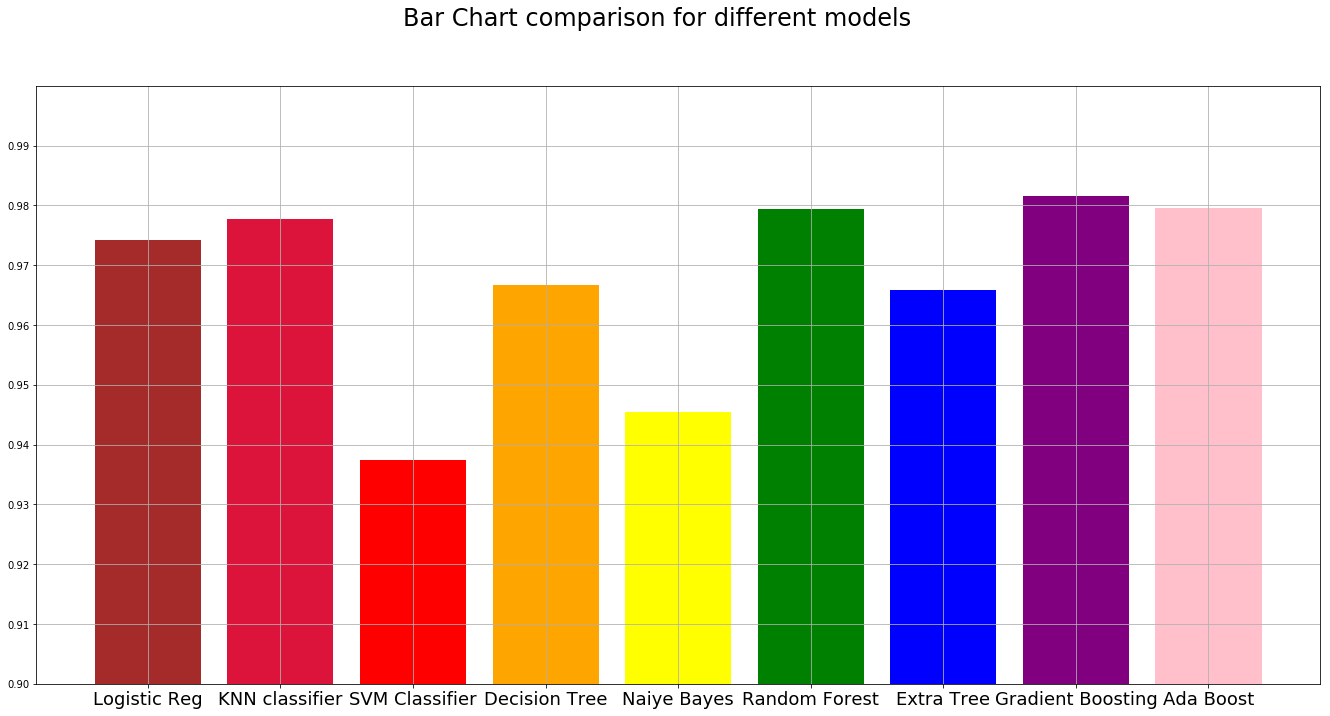

In [64]:
#Bar chart comparison between different models
#Since linear regression shows very less accuracy, hence not included for comparison

models = ("Logistic Reg","KNN classifier","SVM Classifier","Decision Tree","Naiye Bayes","Random Forest","Extra Tree","Gradient Boosting","Ada Boost")

scores = (LR_score,knn_score,svm_score,dt_score,nb_score,rf_score,et_score,gb_score,ab_score)

colors = ("brown","crimson","red","orange","yellow","green","blue","purple","pink")

y = np.arange(1,10)

plt.figure(figsize=(23,11))
plt.xticks(y,models,fontsize=18)
plt.yticks(np.arange(0,1,step=0.01))
plt.ylim(0.9,1)
plt.bar(y,scores,color=colors)
plt.grid()
plt.suptitle("Bar Chart comparison for different models",fontsize=24)
plt.show()

In [ ]:
#Hence, gradient boosting shows the maximum accuracy 